In [3]:
import matplotlib.pyplot as plt
import albumentations as A
import cv2
import seaborn as sns
import random
import numpy as np
from collections import Counter

# random.seed(7)

# 엉망진창 데이터 실험기

## RandomBrightnessContrast

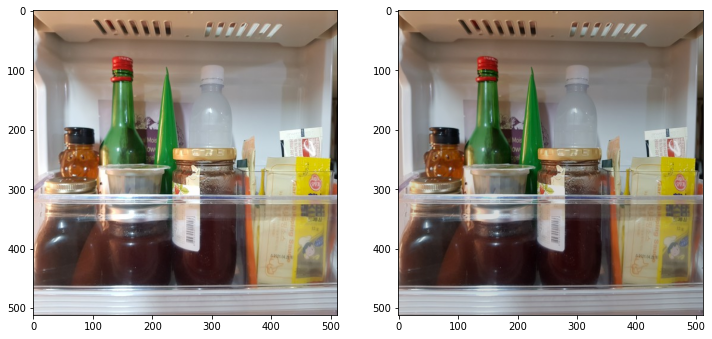

In [44]:
image = cv2.imread('/opt/ml/segmentation/input/data/batch_01_vt/0002.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

transform = A.RandomBrightnessContrast()
transform = transform(image=image)
transform['image']

ax1.imshow(image)
ax2.imshow(transform['image'])

plt.show()


## CropNonEmptyMaskIfExists

[  6 255] [358797 427635]
{6: 358797, 255: 427635}
0.4562339782714844


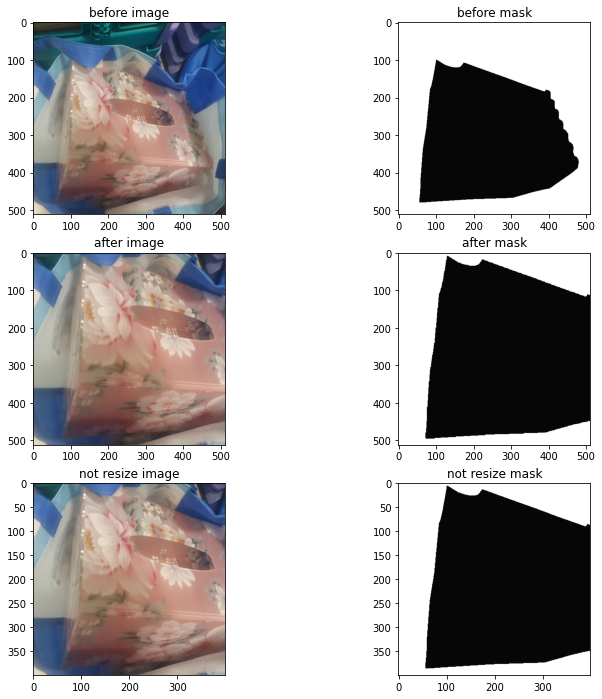

In [105]:
'''
고려해야 할 점
- 배경이 많은 경우만 적용하게 할까?
    - 이미지 리사이즈를 해서 리턴해줘야 하는가(각 이미지의 크기가 달라짐)
    - 이미지별 평균 background 가 얼마나 존재하는지 확인해야겠다. -> EDA 진행해서 배경 비율 확인하면 해결 될지도
'''
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
file_name = '0099'
image = cv2.imread('/opt/ml/lab/mmsegmentation/dataset/images/train/'+file_name+'.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread('/opt/ml/lab/mmsegmentation/dataset/annotations/train/'+file_name+'.png')

transform = A.crops.transforms.CropNonEmptyMaskIfExists(height=400, width=400)
transform = transform(image=image, mask=mask)
ax[2][0].imshow(transform['image'])
ax[2][1].imshow(np.where(transform['mask']==0, 255, transform['mask']))


resize = A.Resize(512,512)
transform = resize(image=transform['image'], mask=transform['mask'])

mask = np.where(mask==0, 255, mask)
transform['mask'] = np.where(transform['mask']==0,255,transform['mask'])

unique, counts = np.unique(mask, return_counts=True)
print(unique, counts)
test = dict(zip(unique, counts))
print(test)
print( 1 - (test[255] / sum(test.values())))
ax[0][0].set_title('before image')
ax[0][1].set_title('before mask')
ax[1][0].set_title('after image')
ax[1][1].set_title('after mask')
ax[2][0].set_title('not resize image')
ax[2][1].set_title('not resize mask')

ax[0][0].imshow(image)
ax[0][1].imshow(mask)
ax[1][0].imshow(transform['image'])
ax[1][1].imshow(transform['mask'])

plt.show()

## Gridmask(GridDropout)

In [4]:
def make_plot(file_name, transform):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    image = cv2.imread('/opt/ml/lab/mmsegmentation/dataset/images/train/'+file_name+'.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread('/opt/ml/lab/mmsegmentation/dataset/annotations/train/'+file_name+'.png')

    transform = transform(image=image, mask=mask)

    mask = np.where(mask==0, 255, mask)
    transform['mask'] = np.where(transform['mask']==0,255,transform['mask'])

    unique, counts = np.unique(mask, return_counts=True)
    test = dict(zip(unique, counts))
    print(test)
    print( 1 - (test[255] / sum(test.values())))

    ax[0][0].set_title('before image')
    ax[0][1].set_title('before mask')
    ax[1][0].set_title('after image')
    ax[1][1].set_title('after mask')

    ax[0][0].imshow(image)
    ax[0][1].imshow(mask)
    ax[1][0].imshow(transform['image'])
    ax[1][1].imshow(transform['mask'])

    return fig

{6: 174696, 255: 611736}
0.222137451171875


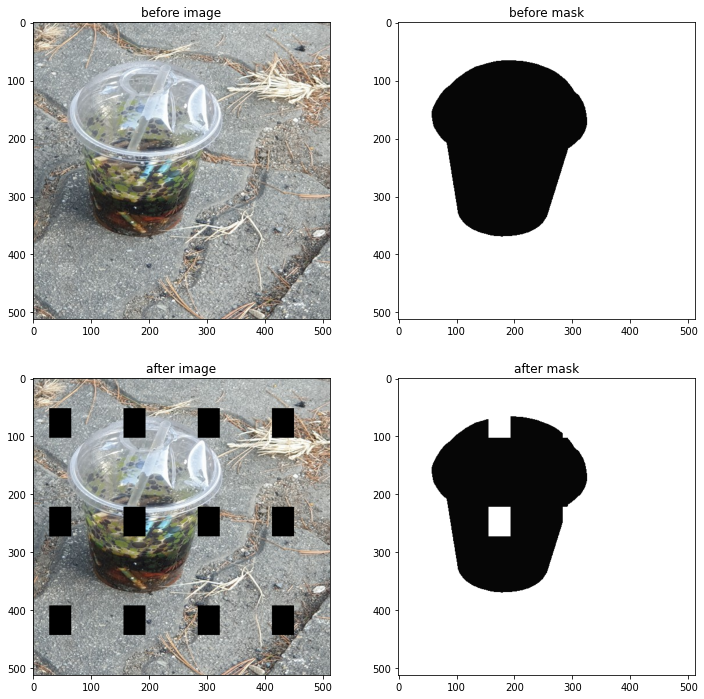

In [18]:
transform = A.augmentations.transforms.GridDropout(ratio=0.3, holes_number_x=4, holes_number_y=3, random_offset=True, p=1.0, mask_fill_value=0)

figure = make_plot(file_name='0234',transform=transform)

figure.show()

## ColorJitter

{6: 174696, 255: 611736}
0.222137451171875


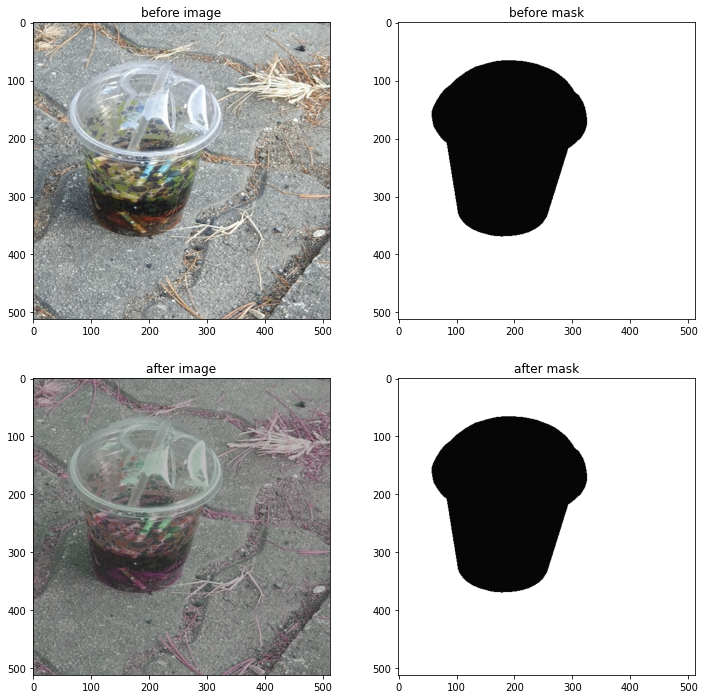

In [5]:
transform = A.ColorJitter()

figure = make_plot(file_name='0234', transform=transform)

figure.show()